In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
from matplotlib import font_manager, rc
import seaborn as sns

D:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


CUS_ID : 사용자 구분id <BR>
TIME_ID : 연도+월+일+시간 (0~23)<BR>
SITE : 클릭 사이트 domain url<BR>
SITE_CNT : 클릭한 사이트 url 내 하위 페이지 뷰 수<BR>
ST_TIME : 머무른 시간 (duration time) sec<BR>
SITE_NM : 클릭한 사이트의 이름<BR>
BACT_NM : 사이트 대분류<BR>
MACT_NM : 시이트 중분류<BR>
ACT_NM : 사이트 소분류<BR>
AC_TIME / YY_MM_DD / DAY : TIME_ID에서 추출한 시간 연도 요일(0:Mon ~ 6 :Sun)

----

In [2]:
train_df=pd.read_pickle("tarin_clicks.pkl")
train_df.shape

(6958530, 14)

In [3]:
train_df.head()

,index,Unnamed: 0,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,AC_TIME,YY_MM_DD,DAY
0,0,0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,5,20120709,0
1,1,1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,7,20120725,2
2,2,2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지,16,20120811,5
3,3,3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,4,20120903,0
4,4,4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,6,20120905,2


In [4]:
train_df["CUS_ID"].unique().shape

(1997,)

In [5]:
train_datapoint=pd.read_csv("train_datapoint_profile.csv")
train_datapoint.shape

(1997, 5)

In [6]:
train_datapoint.head()

,CUS_ID,GENDER,AGE,RESIDENCE,GROUP
0,1188,남자,10,충청,M20-
1,1583,남자,10,인천,M20-
2,194,남자,10,강원,M20-
3,1026,남자,10,서울,M20-
4,2217,남자,20,강원,M20-


----

In [103]:
train_df["SITE_NM"].unique()

array(['네이버 검색', '구글 Plus', '중앙일보', ..., '미모노', '사이버 강원관광 정보망', '울산시티넷'],
      dtype=object)

In [102]:
train_df["SITE"].unique().shape

(33984,)

In [31]:
train_df["BACT_NM"].unique()

array(['인터넷/컴퓨터', '커뮤니티', '뉴스/미디어', '게임', '쇼핑', '엔터테인먼트', '스포츠/레저',
       '생활/가정/취미', '정보통신/IT', '금융/부동산', '교육/학원', '제조', '여행', '비즈니스/경제',
       '온라인교육', '정치/행정', '사회/문화/종교', '유통/판매/운송', '건강/의학', '서비스', '문학/예술',
       '학문'], dtype=object)

In [8]:
train_df["MACT_NM"].unique().shape

(207,)

In [9]:
train_df["ACT_NM"].unique().shape

(1210,)

In [10]:
train_df.loc[train_df["MACT_NM"]=="인터넷신문",:]

,index,Unnamed: 0,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,AC_TIME,YY_MM_DD,DAY
3,3,3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,4,20120903,0
4,4,4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,6,20120905,2
7,7,7,1,2012122801,news.naver.com,3.0,213.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,1,20121228,4
11,11,11,10,2012100410,news.naver.com,6.0,1127.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,10,20121004,3
22,44,44,1000,2012111914,media.daum.net,6.0,768.0,미디어다음,뉴스/미디어,인터넷신문,포털뉴스,14,20121119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958251,8772122,331541,30,2012102316,www.nocutnews.co.kr,1.0,38.0,노컷뉴스,뉴스/미디어,인터넷신문,종합인터넷신문,10,20130421,6
6958257,8772128,331547,306,2013010816,www.mediatoday.co.kr,2.0,83.0,미디어오늘,뉴스/미디어,인터넷신문,종합인터넷신문,16,20130528,1
6958262,8772133,331552,306,2013062017,www.ohmynews.com,1.0,82.0,오마이뉴스,뉴스/미디어,인터넷신문,종합인터넷신문,11,20120920,3
6958310,8772181,331600,368,2012073012,www.mydaily.co.kr,1.0,63.0,마이데일리,뉴스/미디어,인터넷신문,종합인터넷신문,21,20121005,4


In [25]:
a=train_df.loc[train_df["MACT_NM"]=="인터넷신문",:]

In [30]:
a["ACT_NM"].unique().shape

(3,)

In [34]:
train_df.loc[train_df["ACT_NM"]=="포털뉴스",:].MACT_NM.unique()

array(['인터넷신문'], dtype=object)

----
cus_id 로 파일 저장

In [7]:
cus_id = train_df["CUS_ID"].unique()

In [8]:
cus_id= pd.DataFrame(cus_id,columns=["CUS_ID"])

In [9]:
cus_id=cus_id.sort_values(by="CUS_ID")

In [10]:
cus_id=cus_id.reset_index(drop=True, inplace=False)

In [159]:
cus_id.to_csv('sample.csv')

In [18]:
cus_id.head()

,CUS_ID
0,1
1,2
2,4
3,5
4,8


------
BACT_NM 별 SITE_CNT 수

In [6]:
site_nm=train_df.loc[:,["CUS_ID","SITE_CNT","BACT_NM"]]

In [7]:
site_nm

,CUS_ID,SITE_CNT,BACT_NM
0,1,3.0,인터넷/컴퓨터
1,1,1.0,커뮤니티
2,1,2.0,뉴스/미디어
3,1,5.0,뉴스/미디어
4,1,1.0,뉴스/미디어
...,...,...,...
6958525,836,3.0,인터넷/컴퓨터
6958526,836,3.0,쇼핑
6958527,836,11.0,인터넷/컴퓨터
6958528,836,1.0,뉴스/미디어


In [8]:
df=site_nm.groupby(['CUS_ID','BACT_NM']).sum()

In [9]:
df.head()

SITE_CNT
CUS_ID BACT_NM          
1      게임          315.0
       교육/학원         1.0
       금융/부동산        9.0
       뉴스/미디어     2854.0
       문학/예술         5.0

In [10]:
df_last=df.unstack()

In [11]:
df_last=df_last.fillna(value=0.0)

In [12]:
df_last

SITE_CNT                                                       \
BACT_NM    건강/의학     게임  교육/학원  금융/부동산  뉴스/미디어 문학/예술 비즈니스/경제 사회/문화/종교   
CUS_ID                                                                  
1            0.0  315.0    1.0     9.0  2854.0   5.0    91.0      1.0   
2           14.0   18.0   60.0   482.0  1734.0   4.0  4596.0      2.0   
4            1.0    1.0    0.0   306.0  2277.0   0.0    57.0      0.0   
5           11.0    7.0    2.0   664.0  3280.0   0.0     6.0      1.0   
8            0.0    0.0    2.0   994.0   304.0   0.0    30.0      0.0   
...          ...    ...    ...     ...     ...   ...     ...      ...   
2494        13.0    0.0   10.0   608.0  1628.0  24.0   370.0    163.0   
2495        12.0   14.0   63.0  8251.0   654.0   8.0  1504.0     88.0   
2496         0.0    9.0   15.0    12.0  2936.0   1.0    62.0     19.0   
2498         7.0    0.0  206.0   820.0  3263.0   0.0   328.0    110.0   
2499         0.0   16.0  485.0   313.0   274.0   0.0   142.0      0.0   

                         ...                                                   \
BACT_NM 생활/가정/취미    서비스  ...  엔터테인먼트     여행   온라인교육 유통/판매/운송  인터넷/컴퓨터 정보통신/IT   
CUS_ID                   ...                                                    
1            0.0    5.0  ...  1459.0    6.0   215.0      0.0   5578.0     0.0   
2           64.0  270.0  ...   416.0  174.0    32.0     60.0  18934.0   208.0   
4            0.0    5.0  ...    22.0    2.0     3.0      9.0   7188.0    71.0   
5          342.0    0.0  ...    48.0   10.0    69.0      1.0   7235.0     4.0   
8           40.0   78.0  ...    26.0  248.0     0.0      0.0   6596.0    74.0   
...          ...    ...  ...     ...    ...     ...      ...      ...     ...   
2494        13.0  262.0  ...   221.0  208.0     4.0    103.0  10806.0    12.0   
2495      1280.0  243.0  ...   115.0   84.0     3.0    157.0  18264.0    41.0   
2496        16.0    4.0  ...  4230.0    1.0    44.0      0.0   1923.0    30.0   
2498       155.0   50.0  ...   241.0   20.0    34.0      4.0  10300.0    12.0   
2499        11.0  296.0  ...   350.0   49.0  2475.0     18.0   5237.0     7.0   

                                     
BACT_NM  정치/행정      제조    커뮤니티   학문  
CUS_ID                               
1          4.0     0.0  2993.0  0.0  
2        108.0    50.0  5080.0  0.0  
4        126.0    81.0  2116.0  0.0  
5        352.0     5.0   702.0  2.0  
8        470.0   104.0  1140.0  0.0  
...        ...     ...     ...  ...  
2494      27.0    15.0  1702.0  0.0  
2495     379.0  1397.0  1797.0  0.0  
2496     161.0    13.0   823.0  1.0  
2498       9.0     5.0  4153.0  3.0  
2499     152.0     5.0  1482.0  5.0  

[1997 rows x 22 columns]

In [81]:
c=cus_id

In [82]:
for a in df_last["SITE_CNT"]:
    b=df_last["SITE_CNT"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [84]:
c

,CUS_ID,건강/의학,게임,교육/학원,금융/부동산,뉴스/미디어,문학/예술,비즈니스/경제,사회/문화/종교,생활/가정/취미,...,엔터테인먼트,여행,온라인교육,유통/판매/운송,인터넷/컴퓨터,정보통신/IT,정치/행정,제조,커뮤니티,학문
0,1,0.0,315.0,1.0,9.0,2854.0,5.0,91.0,1.0,0.0,...,1459.0,6.0,215.0,0.0,5578.0,0.0,4.0,0.0,2993.0,0.0
1,2,14.0,18.0,60.0,482.0,1734.0,4.0,4596.0,2.0,64.0,...,416.0,174.0,32.0,60.0,18934.0,208.0,108.0,50.0,5080.0,0.0
2,4,1.0,1.0,0.0,306.0,2277.0,0.0,57.0,0.0,0.0,...,22.0,2.0,3.0,9.0,7188.0,71.0,126.0,81.0,2116.0,0.0
3,5,11.0,7.0,2.0,664.0,3280.0,0.0,6.0,1.0,342.0,...,48.0,10.0,69.0,1.0,7235.0,4.0,352.0,5.0,702.0,2.0
4,8,0.0,0.0,2.0,994.0,304.0,0.0,30.0,0.0,40.0,...,26.0,248.0,0.0,0.0,6596.0,74.0,470.0,104.0,1140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2494,13.0,0.0,10.0,608.0,1628.0,24.0,370.0,163.0,13.0,...,221.0,208.0,4.0,103.0,10806.0,12.0,27.0,15.0,1702.0,0.0
1993,2495,12.0,14.0,63.0,8251.0,654.0,8.0,1504.0,88.0,1280.0,...,115.0,84.0,3.0,157.0,18264.0,41.0,379.0,1397.0,1797.0,0.0
1994,2496,0.0,9.0,15.0,12.0,2936.0,1.0,62.0,19.0,16.0,...,4230.0,1.0,44.0,0.0,1923.0,30.0,161.0,13.0,823.0,1.0
1995,2498,7.0,0.0,206.0,820.0,3263.0,0.0,328.0,110.0,155.0,...,241.0,20.0,34.0,4.0,10300.0,12.0,9.0,5.0,4153.0,3.0


In [85]:
c.to_csv("sample.csv")

-----
요일별 사이트 수

In [86]:
train_df.head()

,index,Unnamed: 0,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,AC_TIME,YY_MM_DD,DAY
0,0,0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,5,20120709,0
1,1,1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,7,20120725,2
2,2,2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지,16,20120811,5
3,3,3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,4,20120903,0
4,4,4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,6,20120905,2


In [96]:
day_df=train_df.loc[:,["CUS_ID","DAY"]]

In [104]:
day_df["DAY_COUNT"]=day_df["DAY"]

In [105]:
day_df.head()

,CUS_ID,DAY,DAY_COUNT
0,1,0,0
1,1,2,2
2,1,5,5
3,1,0,0
4,1,2,2


In [120]:
a=day_df.groupby(['CUS_ID','DAY']).count()

In [121]:
day_last=a.unstack()

In [125]:
day_last=day_last.fillna(value=0)

In [126]:
day_last.head()

DAY_COUNT                                              
DAY            0       1       2       3       4      5      6
CUS_ID                                                        
1          604.0   578.0   676.0   554.0   485.0  355.0  574.0
2         1927.0  2299.0  1768.0  2169.0  1826.0  479.0  356.0
4          418.0   346.0   388.0   318.0   286.0  130.0   81.0
5         1021.0   615.0   584.0   755.0   735.0  397.0   65.0
8          572.0   543.0   590.0   581.0   471.0  116.0   75.0

In [129]:
c=cus_id

In [131]:
for a in day_last["DAY_COUNT"]:
    b=day_last["DAY_COUNT"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [132]:
c.head()

,CUS_ID,0,1,2,3,4,5,6
0,1,604.0,578.0,676.0,554.0,485.0,355.0,574.0
1,2,1927.0,2299.0,1768.0,2169.0,1826.0,479.0,356.0
2,4,418.0,346.0,388.0,318.0,286.0,130.0,81.0
3,5,1021.0,615.0,584.0,755.0,735.0,397.0,65.0
4,8,572.0,543.0,590.0,581.0,471.0,116.0,75.0


In [133]:
c.to_csv("variable_2.csv")

----
요일별 사이트 접속 시간

In [134]:
day_df=train_df.loc[:,["CUS_ID","DAY","ST_TIME"]]

In [136]:
a=day_df.groupby(['CUS_ID','DAY']).sum()

In [139]:
day_time_last=a.unstack()
day_time_last=day_time_last.fillna(value=0)

In [141]:
c= cus_id
for a in day_time_last["ST_TIME"]:
    b=day_time_last["ST_TIME"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [143]:
c.to_csv("variable_3.csv")

-----
오전 / 오후 사이트 접속 수 (정오 = 오후)

In [7]:
train_df.head()

,index,Unnamed: 0,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,AC_TIME,YY_MM_DD,DAY
0,0,0,1,2012070905,search.naver.com,3.0,794.0,네이버 검색,인터넷/컴퓨터,검색,포털검색,5,20120709,0
1,1,1,1,2012072507,plus.google.com,1.0,1.0,구글 Plus,커뮤니티,블로그/SNS,SNS,7,20120725,2
2,2,2,1,2012081116,joongang.joinsmsn.com,2.0,5.0,중앙일보,뉴스/미디어,일간지,종합일간지,16,20120811,5
3,3,3,1,2012090304,news.naver.com,5.0,504.0,네이버 뉴스,뉴스/미디어,인터넷신문,포털뉴스,4,20120903,0
4,4,4,1,2012090506,news.nate.com,1.0,0.0,네이트 뉴스,뉴스/미디어,인터넷신문,포털뉴스,6,20120905,2


In [9]:
time_site_count=train_df.loc[:,["CUS_ID","AC_TIME"]]

In [11]:
a=time_site_count.head()

In [6]:
def time(x):
    if x < 12 : return "am"
    elif x >=12 : return "pm"

In [39]:
time_site_count["time"]=time_site_count["AC_TIME"].apply(time)

In [41]:
t_s=time_site_count.groupby(['CUS_ID','time']).count()

In [43]:
t_s=t_s.unstack()

In [44]:
t_s=t_s.fillna(value=0)

In [51]:
c= cus_id
for a in t_s["AC_TIME"]:
    b=t_s["AC_TIME"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [53]:
c.to_csv("variable_4.csv")

----
클릭한 사이트 이름 빈도 수 확인

In [8]:
A=train_df.loc[:,"SITE_NM"]

In [29]:
a=A.value_counts().head(40)

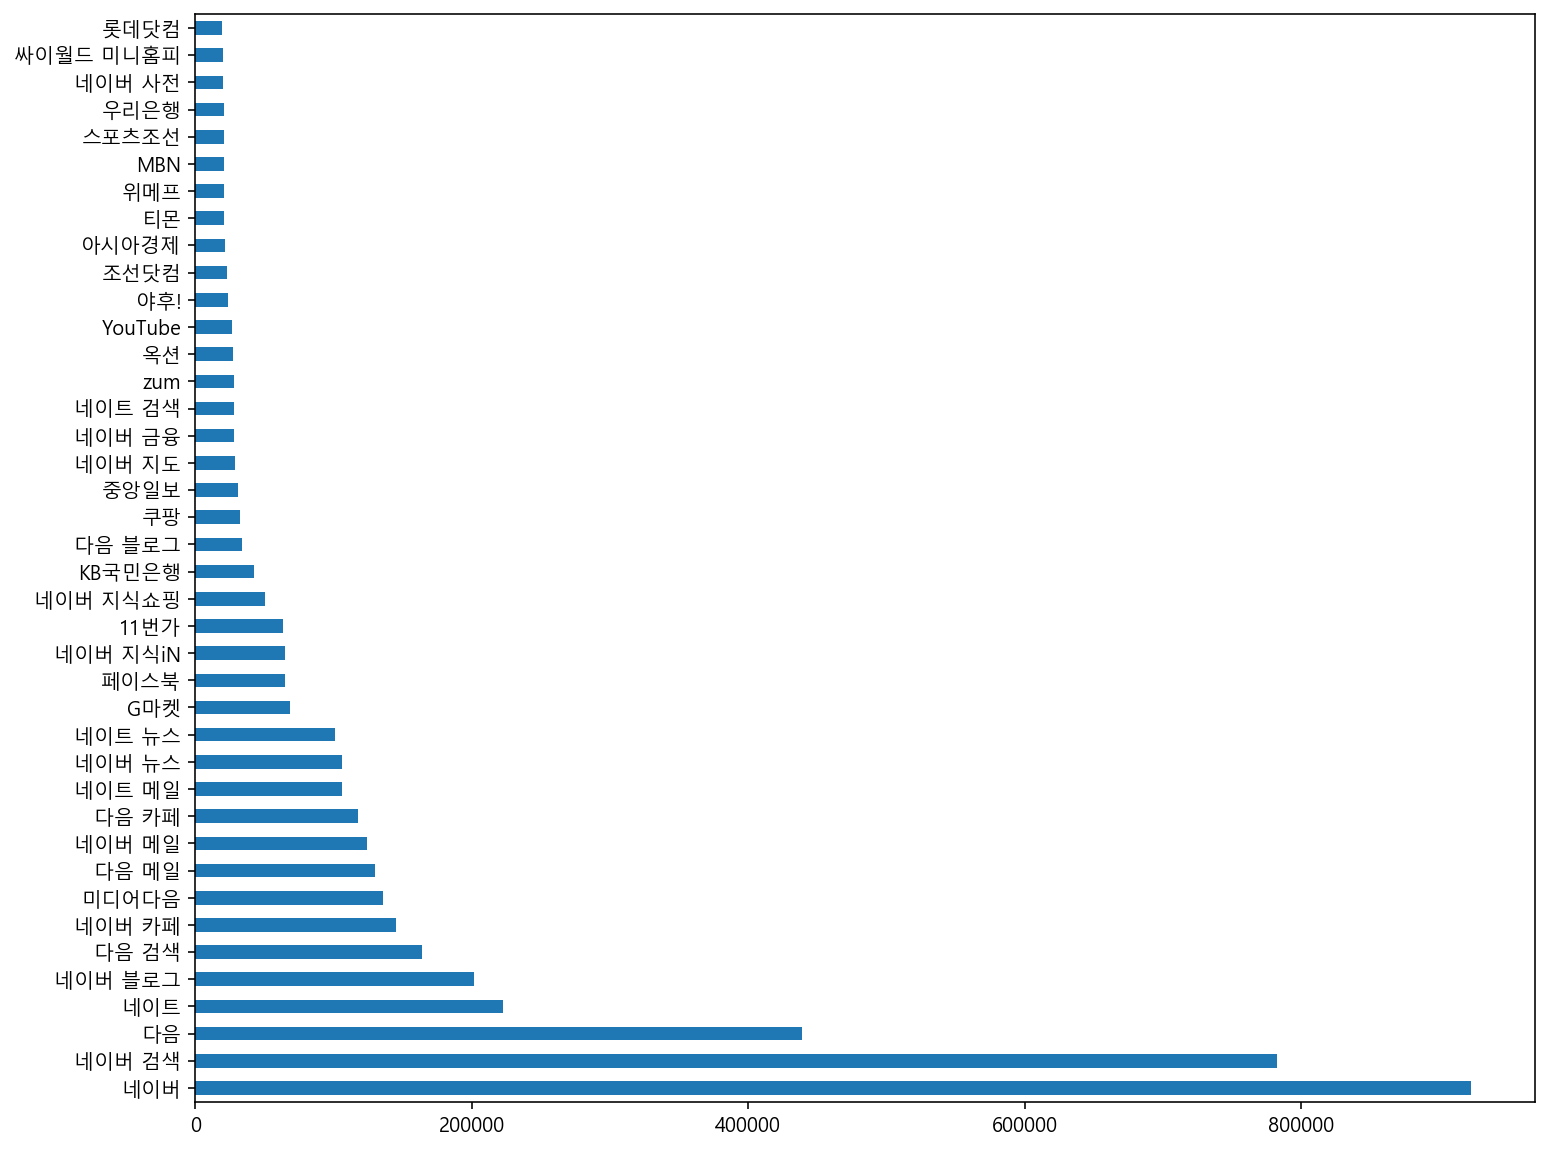

In [30]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
a.plot(kind="barh",figsize=(12,10))

In [31]:
a

네이버          922804
네이버 검색       782627
다음           438809
네이트          222401
네이버 블로그      201804
다음 검색        164174
네이버 카페       144877
미디어다음        135419
다음 메일        130169
네이버 메일       123913
다음 카페        117648
네이트 메일       106186
네이버 뉴스       105850
네이트 뉴스       101057
G마켓           68580
페이스북          65140
네이버 지식iN      64762
11번가          63739
네이버 지식쇼핑      50177
KB국민은행        42589
다음 블로그        33846
쿠팡            31937
중앙일보          30836
네이버 지도        28599
네이버 금융        28225
네이트 검색        28002
zum           27718
옥션            27046
YouTube       26761
야후!           23674
조선닷컴          22540
아시아경제         21400
티몬            20907
위메프           20854
MBN           20774
스포츠조선         20505
우리은행          20430
네이버 사전        20305
싸이월드 미니홈피     20104
롯데닷컴          19576
Name: SITE_NM, dtype: int64

----
특정 사이트 들어간 빈도 수 

In [13]:
a=train_df.loc[:,["CUS_ID","SITE_NM"]]

In [14]:
site_name=pd.read_csv("특정사이트목록.csv")

In [15]:
site_name

,SITE_NM
0,네이버
1,네이버 검색
2,다음
3,네이트
4,네이버 블로그
5,다음 검색
6,네이버 카페
7,미디어다음
8,다음 메일
9,네이버 메일


In [90]:
aa=pd.merge(a,site_name,on="SITE_NM")

In [98]:
aa["COUNT"]=aa["SITE_NM"]

In [100]:
group=aa.groupby(['CUS_ID','SITE_NM']).count()

In [101]:
group=group.unstack()

In [107]:
group=group.fillna(value=0)

In [108]:
c= cus_id
for a in group["COUNT"]:
    b=group["COUNT"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [109]:
c

,CUS_ID,11번가,G마켓,네이버,네이버 검색,네이버 뉴스,네이버 메일,네이버 블로그,네이버 지식iN,네이버 지식쇼핑,네이버 카페,네이트,네이트 뉴스,네이트 메일,다음,다음 검색,다음 메일,다음 카페,미디어다음,페이스북
0,1,0.0,0.0,693.0,272.0,326.0,18.0,86.0,7.0,0.0,18.0,75.0,57.0,0.0,184.0,8.0,142.0,5.0,78.0,22.0
1,2,48.0,56.0,576.0,1584.0,36.0,12.0,170.0,76.0,404.0,86.0,36.0,4.0,252.0,24.0,2.0,2.0,10.0,0.0,156.0
2,4,1.0,9.0,215.0,93.0,4.0,76.0,12.0,10.0,1.0,19.0,307.0,451.0,14.0,1.0,0.0,2.0,1.0,0.0,13.0
3,5,17.0,18.0,775.0,612.0,143.0,11.0,90.0,75.0,39.0,76.0,2.0,3.0,0.0,78.0,27.0,8.0,39.0,32.0,8.0
4,8,44.0,0.0,266.0,186.0,2.0,48.0,58.0,18.0,10.0,18.0,336.0,78.0,80.0,342.0,86.0,0.0,8.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2494,21.0,31.0,677.0,451.0,11.0,12.0,96.0,40.0,116.0,53.0,286.0,287.0,369.0,2.0,0.0,1.0,1.0,6.0,74.0
1992,2495,39.0,14.0,696.0,109.0,0.0,152.0,97.0,9.0,5.0,100.0,163.0,3.0,4.0,673.0,572.0,529.0,139.0,160.0,11.0
1993,2496,0.0,0.0,163.0,196.0,18.0,21.0,52.0,38.0,0.0,28.0,5.0,18.0,5.0,6.0,8.0,2.0,4.0,1.0,5.0
1994,2498,13.0,6.0,349.0,435.0,9.0,14.0,185.0,25.0,26.0,47.0,52.0,9.0,2.0,859.0,533.0,160.0,367.0,277.0,10.0


In [110]:
c.to_csv("variable_5.csv")

-------
특정사이트에서 머문 시간 평균

In [136]:
a=train_df.loc[:,["CUS_ID","SITE_NM","ST_TIME"]]

In [137]:
aa=pd.merge(a,site_name,on="SITE_NM")

In [138]:
aa

,CUS_ID,SITE_NM,ST_TIME
0,1,네이버 검색,794.0
1,1,네이버 검색,0.0
2,1000,네이버 검색,29.0
3,1000,네이버 검색,167.0
4,1000,네이버 검색,186.0
...,...,...,...
4010131,2081,11번가,60.0
4010132,2081,11번가,63.0
4010133,2157,11번가,4.0
4010134,2449,11번가,10.0


In [139]:
group=aa.groupby(['CUS_ID','SITE_NM']).mean()

In [140]:
group=group.unstack()
group=group.fillna(value=0)

In [141]:
group

ST_TIME                                                  \
SITE_NM        11번가         G마켓         네이버      네이버 검색      네이버 뉴스   
CUS_ID                                                                
1          0.000000    0.000000   43.727273  156.051471  196.717791   
2        251.958333  174.821429  158.937500  119.991162  129.944444   
4        209.000000  185.222222  142.869767  147.967742  104.000000   
5        384.411765   34.833333  168.969032  110.366013  190.790210   
8        106.681818    0.000000   20.639098   81.462366    0.000000   
...             ...         ...         ...         ...         ...   
2494     101.809524  121.451613   79.997046  115.676275   46.727273   
2495     151.256410   44.857143   78.415230   51.834862    0.000000   
2496       0.000000    0.000000   29.073620   54.127551  104.333333   
2498      92.769231   66.666667   41.080229  120.579310  127.444444   
2499       0.000000  104.878788   37.610837   91.231214   16.571429   

                                                                     \
SITE_NM      네이버 메일     네이버 블로그    네이버 지식iN    네이버 지식쇼핑      네이버 카페   
CUS_ID                                                                
1         15.833333   39.848837   47.142857    0.000000  132.444444   
2        430.000000   86.200000   28.105263  254.985149  296.069767   
4        117.697368  310.083333   76.400000  663.000000  114.105263   
5        103.636364  186.666667   41.693333  300.794872  216.986842   
8        130.166667  154.000000  290.000000  147.000000  202.666667   
...             ...         ...         ...         ...         ...   
2494      24.416667  128.979167   34.725000  242.267241  417.226415   
2495      44.276316   43.123711   25.666667   86.600000  176.620000   
2496     383.000000  153.307692  113.842105    0.000000  128.000000   
2498     300.142857  113.994595    7.480000  246.692308  101.978723   
2499     266.750000  130.961538   50.083333   79.400000  229.477477   

                                                                    \
SITE_NM        네이트      네이트 뉴스      네이트 메일          다음       다음 검색   
CUS_ID                                                               
1         9.106667   34.561404    0.000000    4.538043   59.125000   
2        69.333333  791.500000   92.611111  110.583333  119.000000   
4        74.729642  153.631929  129.357143    1.000000    0.000000   
5         0.000000   79.666667    0.000000    5.435897  231.481481   
8         2.297619    1.205128   40.850000   29.356725  192.883721   
...            ...         ...         ...         ...         ...   
2494     24.790210   18.400697   92.346883    0.000000    0.000000   
2495      1.668712    0.333333   22.250000  196.499257  347.290210   
2496      2.200000   51.388889   92.600000   18.166667   70.500000   
2498      4.653846    6.888889   10.000000  115.294529  307.675422   
2499      8.916667    1.666667   40.000000   37.005435  132.571429   

                                                        
SITE_NM       다음 메일      다음 카페       미디어다음        페이스북  
CUS_ID                                                  
1         64.950704  23.200000   21.641026    0.545455  
2          6.000000  29.400000    0.000000  312.564103  
4        252.500000   5.000000    0.000000  992.384615  
5         64.750000  65.282051   75.656250   60.000000  
8          0.000000   2.250000    8.300000   17.800000  
...             ...        ...         ...         ...  
2494      14.000000   0.000000   16.166667  146.608108  
2495     264.546314  16.107914  134.443750   69.272727  
2496      94.500000   7.500000    6.000000  104.000000  
2498      94.743750  80.405995  150.678700    1.300000  
2499      78.117347  18.475410   41.466667   96.166667  

[1996 rows x 19 columns]

In [142]:
c= cus_id
for a in group["ST_TIME"]:
    b=group["ST_TIME"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [143]:
c

,CUS_ID,11번가,G마켓,네이버,네이버 검색,네이버 뉴스,네이버 메일,네이버 블로그,네이버 지식iN,네이버 지식쇼핑,네이버 카페,네이트,네이트 뉴스,네이트 메일,다음,다음 검색,다음 메일,다음 카페,미디어다음,페이스북
0,1,0.000000,0.000000,43.727273,156.051471,196.717791,15.833333,39.848837,47.142857,0.000000,132.444444,9.106667,34.561404,0.000000,4.538043,59.125000,64.950704,23.200000,21.641026,0.545455
1,2,251.958333,174.821429,158.937500,119.991162,129.944444,430.000000,86.200000,28.105263,254.985149,296.069767,69.333333,791.500000,92.611111,110.583333,119.000000,6.000000,29.400000,0.000000,312.564103
2,4,209.000000,185.222222,142.869767,147.967742,104.000000,117.697368,310.083333,76.400000,663.000000,114.105263,74.729642,153.631929,129.357143,1.000000,0.000000,252.500000,5.000000,0.000000,992.384615
3,5,384.411765,34.833333,168.969032,110.366013,190.790210,103.636364,186.666667,41.693333,300.794872,216.986842,0.000000,79.666667,0.000000,5.435897,231.481481,64.750000,65.282051,75.656250,60.000000
4,8,106.681818,0.000000,20.639098,81.462366,0.000000,130.166667,154.000000,290.000000,147.000000,202.666667,2.297619,1.205128,40.850000,29.356725,192.883721,0.000000,2.250000,8.300000,17.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2494,101.809524,121.451613,79.997046,115.676275,46.727273,24.416667,128.979167,34.725000,242.267241,417.226415,24.790210,18.400697,92.346883,0.000000,0.000000,14.000000,0.000000,16.166667,146.608108
1992,2495,151.256410,44.857143,78.415230,51.834862,0.000000,44.276316,43.123711,25.666667,86.600000,176.620000,1.668712,0.333333,22.250000,196.499257,347.290210,264.546314,16.107914,134.443750,69.272727
1993,2496,0.000000,0.000000,29.073620,54.127551,104.333333,383.000000,153.307692,113.842105,0.000000,128.000000,2.200000,51.388889,92.600000,18.166667,70.500000,94.500000,7.500000,6.000000,104.000000
1994,2498,92.769231,66.666667,41.080229,120.579310,127.444444,300.142857,113.994595,7.480000,246.692308,101.978723,4.653846,6.888889,10.000000,115.294529,307.675422,94.743750,80.405995,150.678700,1.300000


In [144]:
c.to_csv("variable_6.csv")

---
오전 / 오후 사이트 접속 시간 평균

In [8]:
time_site_mean=train_df.loc[:,["CUS_ID","AC_TIME","ST_TIME"]]

In [12]:
time_site_mean

,CUS_ID,AC_TIME,ST_TIME
0,1,am,794.0
1,1,am,1.0
2,1,pm,5.0
3,1,am,504.0
4,1,am,0.0
...,...,...,...
6958525,836,am,0.0
6958526,836,pm,29.0
6958527,836,pm,0.0
6958528,836,pm,0.0


In [11]:
time_site_mean["AC_TIME"]=time_site_mean["AC_TIME"].apply(time)

In [14]:
t_s=time_site_mean.groupby(['CUS_ID','AC_TIME']).mean()

In [15]:
t_s=t_s.unstack()

In [16]:
t_s=t_s.fillna(value=0)

In [22]:
t_s

ST_TIME            
AC_TIME          am          pm
CUS_ID                         
1        108.720730   77.426875
2        160.880644  151.833225
4        178.009885  123.176471
5        122.195772  119.641051
8         67.979927   69.532397
...             ...         ...
2494      94.148558   98.594732
2495     147.794463  148.328726
2496     192.399635  260.922568
2498     107.868171  135.902266
2499     209.146718  134.308463

[1997 rows x 2 columns]

In [24]:
c= cus_id
for a in t_s["ST_TIME"]:
    b=t_s["ST_TIME"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [25]:
c

,CUS_ID,am,pm
0,1,108.720730,77.426875
1,2,160.880644,151.833225
2,4,178.009885,123.176471
3,5,122.195772,119.641051
4,8,67.979927,69.532397
...,...,...,...
1992,2494,94.148558,98.594732
1993,2495,147.794463,148.328726
1994,2496,192.399635,260.922568
1995,2498,107.868171,135.902266


In [26]:
c.to_csv("variable_7.csv")

-------
특정사이트에서 머문 시간 최대치

In [16]:
a=train_df.loc[:,["CUS_ID","SITE_NM","ST_TIME"]]

In [17]:
aa=pd.merge(a,site_name,on="SITE_NM")

In [18]:
aa

,CUS_ID,SITE_NM,ST_TIME
0,1,네이버 검색,794.0
1,1,네이버 검색,0.0
2,1000,네이버 검색,29.0
3,1000,네이버 검색,167.0
4,1000,네이버 검색,186.0
...,...,...,...
4010131,2081,11번가,60.0
4010132,2081,11번가,63.0
4010133,2157,11번가,4.0
4010134,2449,11번가,10.0


In [19]:
group=aa.groupby(['CUS_ID','SITE_NM']).max()

In [20]:
group=group.unstack()
group=group.fillna(value=0)

In [21]:
group

ST_TIME                                                           \
SITE_NM    11번가     G마켓     네이버  네이버 검색  네이버 뉴스  네이버 메일 네이버 블로그 네이버 지식iN   
CUS_ID                                                                     
1           0.0     0.0   886.0  1768.0   960.0    42.0   789.0    258.0   
2         862.0  1529.0  2207.0  3075.0   378.0  1311.0   573.0    636.0   
4         209.0   658.0   900.0  1028.0   192.0   684.0  2247.0    636.0   
5        1185.0   347.0  1755.0  1894.0  1252.0   264.0  1177.0    412.0   
8         854.0     0.0   895.0  1298.0     0.0   669.0   866.0   1045.0   
...         ...     ...     ...     ...     ...     ...     ...      ...   
2494      621.0   655.0  1045.0  1670.0   148.0   129.0  1060.0    428.0   
2495      795.0   538.0   878.0   545.0     0.0   753.0   579.0    105.0   
2496        0.0     0.0  1196.0   797.0   541.0  2666.0  1124.0    797.0   
2498      407.0   156.0   755.0  2218.0   847.0  1656.0  1131.0    100.0   
2499        0.0   722.0   647.0  1416.0    42.0   563.0   845.0    114.0   

                                                                          \
SITE_NM 네이버 지식쇼핑  네이버 카페     네이트  네이트 뉴스  네이트 메일      다음   다음 검색   다음 메일   
CUS_ID                                                                     
1            0.0   762.0   175.0   425.0     0.0    91.0   188.0   604.0   
2         2068.0  2227.0   301.0  1583.0   688.0   530.0   119.0     6.0   
4          663.0   395.0  3129.0  3127.0   572.0     1.0     0.0   445.0   
5         1624.0   881.0     0.0   146.0     0.0   123.0   886.0   308.0   
8          264.0   655.0   218.0    33.0   255.0  1199.0  1088.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
2494      1528.0  2179.0  1144.0   331.0  1214.0     0.0     0.0    14.0   
2495       134.0  1468.0   234.0     1.0    64.0  4200.0  2026.0  1558.0   
2496         0.0   493.0     4.0   300.0   215.0    29.0   409.0   120.0   
2498      2094.0   634.0   145.0    36.0    13.0  4514.0  1347.0  1612.0   
2499       202.0  1544.0   100.0     5.0    69.0  1354.0   552.0   811.0   

                                 
SITE_NM   다음 카페   미디어다음    페이스북  
CUS_ID                           
1          41.0   312.0     7.0  
2          82.0     0.0  2019.0  
4           5.0     0.0  3623.0  
5         531.0   610.0   248.0  
8           5.0    60.0    52.0  
...         ...     ...     ...  
2494        0.0    79.0   571.0  
2495      350.0  1017.0   674.0  
2496       10.0     6.0   366.0  
2498     1287.0  1650.0     5.0  
2499      187.0   220.0   400.0  

[1996 rows x 19 columns]

In [22]:
c= cus_id
for a in group["ST_TIME"]:
    b=group["ST_TIME"][a]
    b=pd.DataFrame(b)
    c=pd.merge(c,b,on="CUS_ID")

In [23]:
c

,CUS_ID,11번가,G마켓,네이버,네이버 검색,네이버 뉴스,네이버 메일,네이버 블로그,네이버 지식iN,네이버 지식쇼핑,네이버 카페,네이트,네이트 뉴스,네이트 메일,다음,다음 검색,다음 메일,다음 카페,미디어다음,페이스북
0,1,0.0,0.0,886.0,1768.0,960.0,42.0,789.0,258.0,0.0,762.0,175.0,425.0,0.0,91.0,188.0,604.0,41.0,312.0,7.0
1,2,862.0,1529.0,2207.0,3075.0,378.0,1311.0,573.0,636.0,2068.0,2227.0,301.0,1583.0,688.0,530.0,119.0,6.0,82.0,0.0,2019.0
2,4,209.0,658.0,900.0,1028.0,192.0,684.0,2247.0,636.0,663.0,395.0,3129.0,3127.0,572.0,1.0,0.0,445.0,5.0,0.0,3623.0
3,5,1185.0,347.0,1755.0,1894.0,1252.0,264.0,1177.0,412.0,1624.0,881.0,0.0,146.0,0.0,123.0,886.0,308.0,531.0,610.0,248.0
4,8,854.0,0.0,895.0,1298.0,0.0,669.0,866.0,1045.0,264.0,655.0,218.0,33.0,255.0,1199.0,1088.0,0.0,5.0,60.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2494,621.0,655.0,1045.0,1670.0,148.0,129.0,1060.0,428.0,1528.0,2179.0,1144.0,331.0,1214.0,0.0,0.0,14.0,0.0,79.0,571.0
1992,2495,795.0,538.0,878.0,545.0,0.0,753.0,579.0,105.0,134.0,1468.0,234.0,1.0,64.0,4200.0,2026.0,1558.0,350.0,1017.0,674.0
1993,2496,0.0,0.0,1196.0,797.0,541.0,2666.0,1124.0,797.0,0.0,493.0,4.0,300.0,215.0,29.0,409.0,120.0,10.0,6.0,366.0
1994,2498,407.0,156.0,755.0,2218.0,847.0,1656.0,1131.0,100.0,2094.0,634.0,145.0,36.0,13.0,4514.0,1347.0,1612.0,1287.0,1650.0,5.0


In [24]:
c.to_csv("variable_8.csv")

-----


In [11]:
train_df.loc[train_df["CUS_ID"]==2071,:].head()

,index,Unnamed: 0,CUS_ID,TIME_ID,SITE,SITE_CNT,ST_TIME,SITE_NM,BACT_NM,MACT_NM,ACT_NM,AC_TIME,YY_MM_DD,DAY
11438,14586,14586,2071,2013010710,babosarang.co.kr,1.0,60.0,바보사랑,쇼핑,생활용품 쇼핑몰,선물/디자인소품쇼핑몰,10,20130107,0
37599,47543,47543,2071,2013011609,www.babosarang.co.kr,2.0,1.0,바보사랑,쇼핑,생활용품 쇼핑몰,선물/디자인소품쇼핑몰,9,20130116,2
37600,47544,47544,2071,2013040517,www.babosarang.co.kr,1.0,21.0,바보사랑,쇼핑,생활용품 쇼핑몰,선물/디자인소품쇼핑몰,17,20130405,4
89835,113660,113660,2071,2013040314,www.babosarang.co.kr,1.0,243.0,바보사랑,쇼핑,생활용품 쇼핑몰,선물/디자인소품쇼핑몰,14,20130403,2
141832,179508,179508,2071,2013040816,www.babosarang.co.kr,2.0,35.0,바보사랑,쇼핑,생활용품 쇼핑몰,선물/디자인소품쇼핑몰,16,20130408,0


In [19]:
train_df["BACT_NM"].unique()

array(['인터넷/컴퓨터', '커뮤니티', '뉴스/미디어', '게임', '쇼핑', '엔터테인먼트', '스포츠/레저',
       '생활/가정/취미', '정보통신/IT', '금융/부동산', '교육/학원', '제조', '여행', '비즈니스/경제',
       '온라인교육', '정치/행정', '사회/문화/종교', '유통/판매/운송', '건강/의학', '서비스', '문학/예술',
       '학문'], dtype=object)

In [20]:
train_df["MACT_NM"].unique()

array(['검색', '블로그/SNS', '일간지', '인터넷신문', '온라인게임', '전문뉴스', '모바일컨텐츠',
       '커뮤니케이션', '종합쇼핑', '커뮤니티포털', '멀티미디어/동영상', '웹서비스', '가격비교', '포털',
       '분야별커뮤니티', '골프', '생활', '솔루션', '게임포털', '부동산', '학원', '소프트웨어',
       '만화/애니메이션', '유머/재미', '다운로드', '산업용품 쇼핑몰', '보험', '영화', '자동차', '숙박',
       '의류 쇼핑몰', '쇼핑정보', '인터넷비즈니스', '방송', '잡지/웹진', '교육자료', '학술정보',
       '공공서비스', '지불/결제', '음악', '종교', '무역', '금융', '운송', '데스크탑', '전문병원',
       '게임방송', '취업', '광고/마케팅', '아이템거래', '증권/주식', '쇼핑기타', '화장품/미용 쇼핑몰',
       '도메인/호스팅', '패션잡화 쇼핑몰', '게임전문지/웹진', 'B2B', '정부/기관', '운세',
       '취미/스포츠 쇼핑몰', '도서/음반/악기 쇼핑몰', '생활용품 쇼핑몰', '통신사', '법/법률', '가전 쇼핑몰',
       '지방자치', '어린이커뮤니티', '종합유통', 'SaaS/ASP', '여성커뮤니티', '무선/이동통신',
       '음/식료품', '성인/전문교육', '컨설팅', '학생/교과교육', '인터넷방송', '건강/의학정보', '여행사',
       '연예인/스타', '사회복지', '예술', '가구/인테리어 쇼핑몰', '은행', '교통', '도박', '게임정보',
       '유아교육', '자산관리/운용', '가정용품', '유아/어린이 쇼핑몰', '경제', '선거', '국내지역정보',
       '학교', '식품/건강 쇼핑몰', '명품', '정보통신서비스', '여행정보', '성인', '하드웨어',
       '생활/취미기타', '보안', '음식/식품